# Purchase and Sales Analysis Report

# 📝 Introduction

This report provides a comprehensive analysis of inventory and sales performance for the period **January 1st to May 31st, 2025**. The objective is to deliver clear, actionable insights that support strategic decision-making in the areas of:

- 📦 **Inventory management** (including dead stock identification)
- 💰 **Product-level profitability** (top gainers and loss-makers)
- 🧑‍💼 **Customer and supplier performance**
- 💵 **Pricing strategy via markup analysis**
- 🧠 **Customer segmentation and behavior trends**

By leveraging visualizations and key metrics, the report uncovers hidden patterns, inefficiencies, and growth opportunities. Each section is designed to help stakeholders enhance profitability, streamline operations, and build stronger relationships with both suppliers and customers.

> This data-driven report empowers smarter business decisions by converting raw purchase and sales data into meaningful, strategic insights.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [7]:
purchase_xls = pd.ExcelFile("PurchaseReport_01_01_25_to_31_05_25.xlsx")
sales_xls = pd.ExcelFile("SaleReport_01_02_25_to_31_05_25.xlsx")

In [8]:
purchase_items_df = purchase_xls.parse("Item Details")
sales_items_df = sales_xls.parse("Item Details")

In [9]:
purchase_items = purchase_items_df.iloc[2:].copy()
purchase_items.columns = purchase_items_df.iloc[1]
purchase_items = purchase_items.dropna(subset=["Date", "Item Name", "Amount"])
purchase_items["Date"] = pd.to_datetime(purchase_items["Date"], dayfirst=True, errors='coerce')
purchase_items["Amount"] = pd.to_numeric(purchase_items["Amount"], errors='coerce')
purchase_items = purchase_items.dropna(subset=["Date", "Item Name", "Amount"])
purchase_items["Month"] = purchase_items["Date"].dt.to_period("M")

# Purchase Item Details after removing empty rows 


In [10]:
purchase_items.head()

1,Date,Invoice No./Txn No.,Party Name,Item Name,Item Code,HSN/SAC,Category,MRP,Exp. Date,Quantity,Unit,UnitPrice,Discount Percent,Discount,Tax Percent,Tax,Transaction Type,Amount,Month
3,2025-05-31,GTWB/25370805,Weikfield Foods Pvt. Ltd.,CHEF'S BASKET-CORN STARCH-POUCH-25X1KG-REGAAL,38688076169,11081200,Weikfield,100,NaN,125,NaN,54.75,0,0,12,821.26,Purchase,7665.11,2025-05
4,2025-05-31,GTWB/25370805,Weikfield Foods Pvt. Ltd.,WEIKFIELD-BAKING SODA-PJAR-100X100gm,FG-411305,28363000,Weikfield,33,NaN,300,NaN,15.01,0,0,18,810.61,Purchase,5314.00,2025-05
5,2025-05-31,GTWB/25370805,Weikfield Foods Pvt. Ltd.,WEIKFIELD-COCOA PDR-PJAR-96X50gm,3869853074,18050000,Weikfield,95,NaN,96,NaN,64.82,0,0,18,1120.09,Purchase,7342.81,2025-05
6,2025-05-31,GTWB/25370805,Weikfield Foods Pvt. Ltd.,WEIKFIELD-CORN STARCH-PKT-20X500gm,FG-411309,11081200,Weikfield,95,NaN,120,NaN,56.91,0,0,12,819.48,Purchase,7648.48,2025-05
7,2025-05-31,GTWB/25370805,Weikfield Foods Pvt. Ltd.,CHEF'S BASKET-MACARONI-FUSILI-POU CH-24X400gm,FG-421257,19023010,Weikfield,50,NaN,72,NaN,35.94,0,0,12,310.52,Purchase,2898.20,2025-05


In [11]:
sales_items = sales_items_df.iloc[2:].copy()
sales_items.columns = sales_items_df.iloc[1]
sales_items = sales_items.dropna(subset=["Date", "Item Name", "Amount"])
sales_items["Date"] = pd.to_datetime(sales_items["Date"], dayfirst=True, errors='coerce')
sales_items["Amount"] = pd.to_numeric(sales_items["Amount"], errors='coerce')
sales_items = sales_items.dropna(subset=["Date", "Item Name", "Amount"])
sales_items["Month"] = sales_items["Date"].dt.to_period("M")

# Sales Items Details after removing empty rows

In [12]:
sales_items.head()

1,Date,Invoice No./Txn No.,Party Name,Item Name,Item Code,HSN/SAC,Category,MRP,Exp. Date,Quantity,Unit,UnitPrice,Discount Percent,Discount,Tax Percent,Tax,Transaction Type,Amount,Month
3,2025-05-31,2552,JAISWAL BHANDAR,Exo Bar 60g(+10g) Fr Ging LB (180 pc)(5),1121042036,34054000,JLL,5,NaN,36,Pcs,3.39,0,0,18,21.97,Sale,144.01,2025-05
4,2025-05-31,2552,JAISWAL BHANDAR,Maxo Coil12Hr 40%ND(PRA)(Red)(60 Pc)(37),1331032011,38089191,JLL,40,NaN,6,Pcs,22.88,0,0,18,24.71,Sale,161.99,2025-05
5,2025-05-31,2551,Shree Shyam Bhandar,SD Peanut Butter with Honey Crunchy-300g,PB02HNKG300,20081100,SUNDROP,99,NaN,3,Pcs,79.97,0,0,12,28.79,Sale,268.70,2025-05
6,2025-05-31,2550,Jaiswal Stores,SD Peanut Butter with Honey Creamy-300g,PB01HNKG300,20081100,SUNDROP,99,NaN,1,Pcs,79.97,0,0,12,9.6,Sale,89.57,2025-05
7,2025-05-31,2550,Jaiswal Stores,SD Peanut Butter with Honey Creamy-300g,PB01HNKG300,20081100,SUNDROP,99,NaN,1,Pcs,79.97,0,0,12,9.6,Sale,89.57,2025-05


# MONTH WISE PROFIT AND PROFIT PERCENTAGE ALONG WITH MONTHWISE GROWTH THROUGH VIZUALIZATION

In [13]:
monthly_purchase = purchase_items.groupby("Month")["Amount"].sum().reset_index(name="Total Purchase")
monthly_sales = sales_items.groupby("Month")["Amount"].sum().reset_index(name="Total Sales")

monthly_profit = pd.merge(monthly_purchase, monthly_sales, on="Month", how="outer").fillna(0)
monthly_profit["Profit"] = monthly_profit["Total Sales"] - monthly_profit["Total Purchase"]
monthly_profit["Profit %"] = (monthly_profit["Profit"] / monthly_profit["Total Purchase"].replace(0, np.nan)) * 100
monthly_profit["Month"] = monthly_profit["Month"].astype(str)

In [14]:
monthly_profit.head()

,Month,Total Purchase,Total Sales,Profit,Profit %
0,2025-01,346136.63,0.00,-346136.63,-100.000000
1,2025-02,1148408.35,691426.09,-456982.26,-39.792663
2,2025-03,1420057.11,1271708.72,-148348.39,-10.446650
3,2025-04,1906086.44,1870975.38,-35111.06,-1.842050
4,2025-05,2908069.95,2708807.16,-199262.79,-6.852063


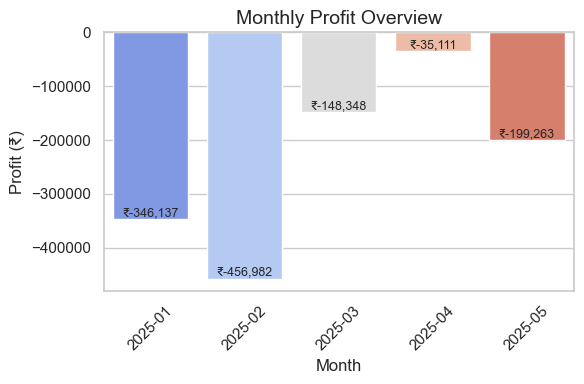

In [15]:
sns.set(style="whitegrid")


monthly_profit["Month"] = monthly_profit["Month"].astype(str)


plt.figure(figsize=(6, 4))
sns.barplot(data=monthly_profit, x="Month", y="Profit", palette="coolwarm")

for index, row in monthly_profit.iterrows():
    plt.text(index, row["Profit"], f'₹{row["Profit"]:,.0f}', ha='center', va='bottom', fontsize=9)


plt.title("Monthly Profit Overview", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Profit (₹)")
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

## CHECKING INVENTORY FLOW FOR DEAD STOCK ITEMS



In [32]:
print("Number of unique items purchased: ",purchase_items["Item Name"].nunique())

Number of unique items purchased:  161


In [31]:
print("Number of unique items sold: ",sales_items["Item Name"].nunique())

Number of unique items sold:  139


## 🧾 Inventory Observation

**Purchase items** contain **161 unique products**, whereas **Sales items** show only **139 unique products**.

➡️ This indicates that **22 unique items** are present in purchase data but have **never been sold** — these are categorized as **🛑 Dead Stock** lying idle in the inventory.


In [34]:
# Convert quantities to numeric
purchase_items["Quantity"] = pd.to_numeric(purchase_items["Quantity"], errors="coerce")
sales_items["Quantity"] = pd.to_numeric(sales_items["Quantity"], errors="coerce")

In [35]:

# Total purchase quantity
purchase_qty = purchase_items.groupby("Item Name")["Quantity"].sum().reset_index()
purchase_qty.rename(columns={"Quantity": "Total Purchased"}, inplace=True)

# Total sales quantity
sales_qty = sales_items.groupby("Item Name")["Quantity"].sum().reset_index()
sales_qty.rename(columns={"Quantity": "Total Sold"}, inplace=True)

# Merge both
inventory_flow = pd.merge(purchase_qty, sales_qty, on="Item Name", how="outer").fillna(0)

# Calculate current stock (theoretical, assuming no waste/returns)
inventory_flow["Current Stock"] = inventory_flow["Total Purchased"] - inventory_flow["Total Sold"]


In [38]:
print("All Over Items Present in the Inventory")
inventory_flow.count()

All Over Items Present in the Inventory


Item Name          161
Total Purchased    161
Total Sold         161
Current Stock      161
dtype: int64

## Now plotting how much percentage products are in deadstock, Fast moving, stockout risk and normal

In [42]:
# This assumes inventory_flow has "Total Purchased", "Total Sold", and "Current Stock"
def classify_item(row):
    if row["Total Purchased"] == 0:
        return "No Purchase"
    elif row["Total Sold"] == 0:
        return "Dead Stock"
    elif row["Current Stock"] <= 0:
        return "Stockout Risk"
    elif row["Total Sold"] >= 0.8 * row["Total Purchased"]:
        return "Fast-Moving"
    else:
        return "Normal"

# Apply classification
inventory_flow["Status"] = inventory_flow.apply(classify_item, axis=1)


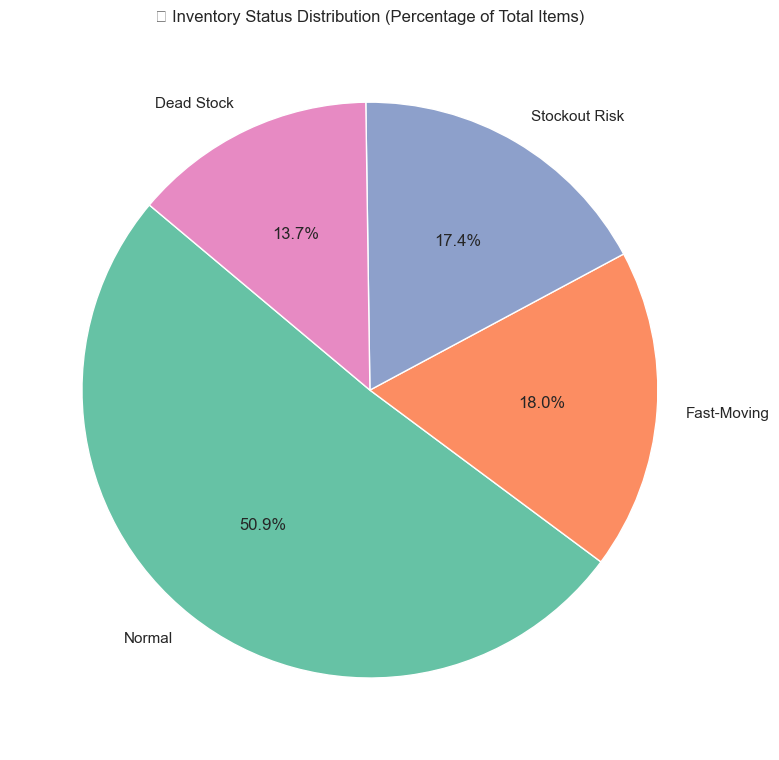

In [43]:
status_counts = inventory_flow["Status"].value_counts()
total_items = len(inventory_flow)
status_percentages = (status_counts / total_items * 100).round(2)

# Pie Chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2", len(status_percentages))
plt.pie(
    status_percentages,
    labels=status_percentages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("📊 Inventory Status Distribution (Percentage of Total Items)")
plt.tight_layout()
plt.show()

## Creating a table with list of items which are considered as Deadstock (Purchased but not being sold)

In [44]:

# Filter dead stock items
dead_stock_items = inventory_flow[inventory_flow["Status"] == "Dead Stock"]

# Select key columns
dead_stock_table = dead_stock_items[["Item Name", "Total Purchased", "Total Sold", "Current Stock"]]

# Reset index for clean display
dead_stock_table = dead_stock_table.reset_index(drop=True)

# Display as a table
from IPython.display import display
display(dead_stock_table)



,Item Name,Total Purchased,Total Sold,Current Stock
0,Act II- IPC Classic Salted -72G (20% Extra)- M...,256.0,0.0,256.0
1,Act II- IPC Golden Sizzle -72G (20% Extra)- MR...,256.0,0.0,256.0
2,CHEF'S BASKET-CORN STARCH-POUCH-25X1KG-REGAAL,125.0,0.0,125.0
3,CHEF'S BASKET-MACARONI-FUSILI-POU CH-24X400gm,72.0,0.0,72.0
4,CHEF'S BASKET-PASTA-MACARONI-POU CH-120X90gm,1200.0,0.0,1200.0
5,CHEF'S BASKET-PASTA-MACARONI-POU CH-24X400gm,48.0,0.0,48.0
6,CHEF'S BASKET-PASTA-MACARONI-POU CH-60X180gm,180.0,0.0,180.0
7,Centbox -Glamour Jumbo,336.0,0.0,336.0
8,Exo Bact Scruber (15),168.0,0.0,168.0
9,Exo Bacto Scrub Ginger Small (200pc)(10),10.0,0.0,10.0


Total 22 items have been found as dead stock.


## 📌 Conclusion

1. **Dead Stock Liquidation via Discounts**  
   Unsold inventory (dead stock) can be moved by offering price reductions. This helps recover at least partial cost and frees up storage.

2. **B2B Channel Strategy**  
   A business-to-business (B2B) approach can be explored to sell dead stock in bulk to retailers, resellers, or distributors at lower margins but higher volume.



## CALCULATING ITEM WISE PROFIT AND FINDING TOP 10 PROFIT MAKING ITEMS AND TOP 10 LOSS MAKING ITEMS THROUGH VIZUALIZATION

In [47]:
purchase_by_item = purchase_items.groupby("Item Name")["Amount"].sum().reset_index(name="Total Purchase")
sales_by_item = sales_items.groupby("Item Name")["Amount"].sum().reset_index(name="Total Sales")

item_profit = pd.merge(purchase_by_item, sales_by_item, on="Item Name", how="outer").fillna(0)
item_profit["Profit"] = item_profit["Total Sales"] - item_profit["Total Purchase"]
item_profit["Profit %"] = (item_profit["Profit"] / item_profit["Total Purchase"].replace(0, np.nan)) * 100

In [59]:
print("Item wise profit table")
item_profit

Item wise profit table


,Item Name,Total Purchase,Total Sales,Profit,Profit %
0,ACT II - IPC Sour Cream and Cheese-50gm-256 fr...,3246.75,2901.68,-345.07,-10.628167
1,ACT II - IPC- Chilli Surprise-30g + 5g Extra-35g,10147.20,7498.86,-2648.34,-26.099219
2,ACT II - IPC- Golden Sizzle-30g + 5g Extra-35g,8117.76,6396.73,-1721.03,-21.200799
3,ACT II IPC Ranger Pack- (CS/GS/MB)-1.575Kg,73051.25,49403.04,-23648.21,-32.372081
4,ACT II RTE Butter Blast -17g + 6g Extra =23g,28435.46,31002.34,2566.88,9.027039
...,...,...,...,...,...
156,WEIKFIELD-BAKING SODA-PJAR-100X100gm,5314.00,0.00,-5314.00,-100.000000
157,WEIKFIELD-COCOA PDR-PJAR-96X50gm,7342.81,0.00,-7342.81,-100.000000
158,WEIKFIELD-CORN STARCH-PKT-100X100gm,15939.84,0.00,-15939.84,-100.000000
159,WEIKFIELD-CORN STARCH-PKT-20X500gm,7648.48,0.00,-7648.48,-100.000000


# TOP 10 PROFITABBLE ITEMS AND TOP 10 LOSS ITEMS

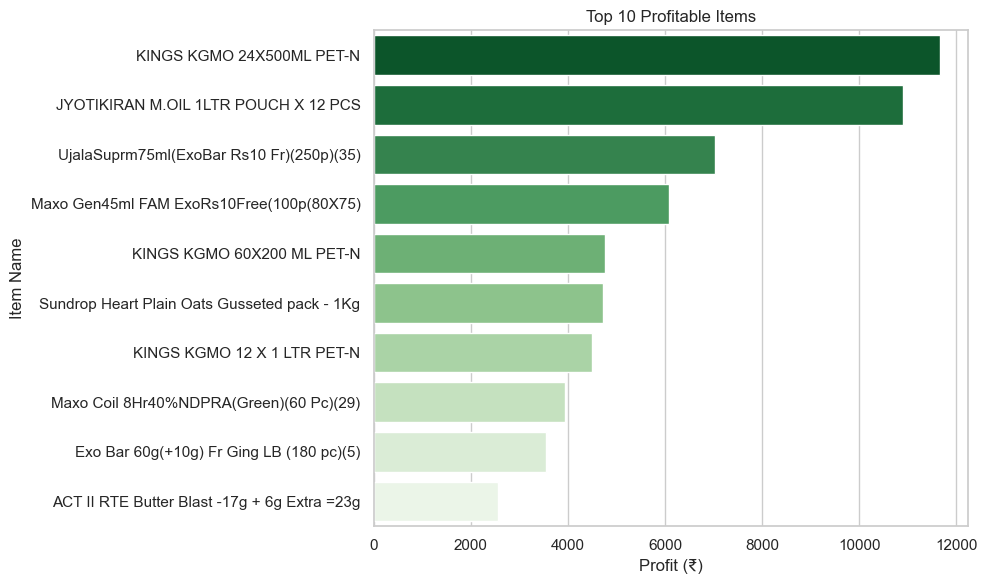

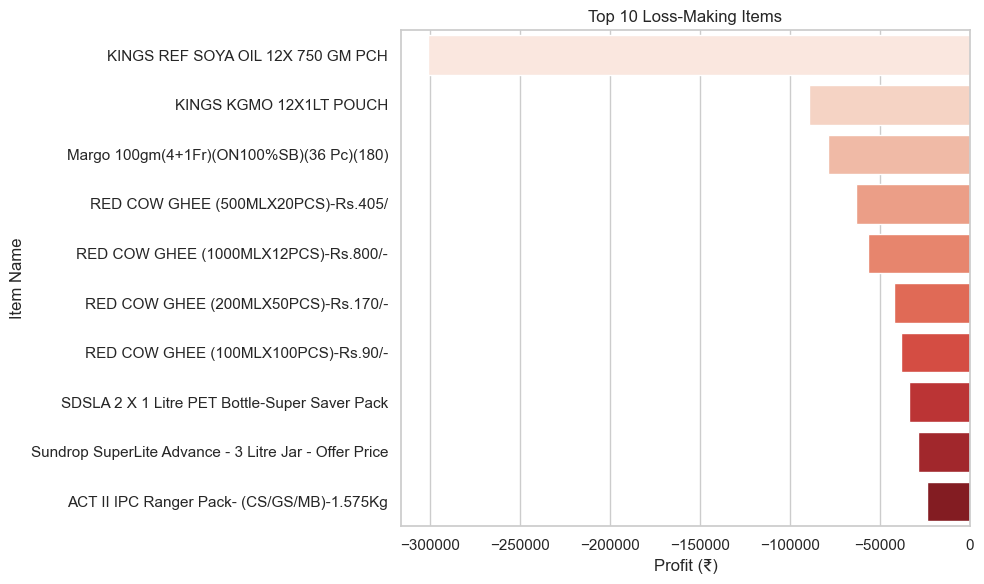

In [60]:
# Split the data
profitable_items = item_profit[item_profit["Profit"] > 0].sort_values(by="Profit", ascending=False)
non_profitable_items = item_profit[item_profit["Profit"] <= 0].sort_values(by="Profit")

# Limit number of items to display
top_profitable = profitable_items.head(10)
top_loss = non_profitable_items.head(10)

# Plot profitable items
plt.figure(figsize=(10, 6))
sns.barplot(data=top_profitable, y="Item Name", x="Profit", palette="Greens_r")
plt.title("Top 10 Profitable Items")
plt.xlabel("Profit (₹)")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()

# Plot non-profitable items
plt.figure(figsize=(10, 6))
sns.barplot(data=top_loss, y="Item Name", x="Profit", palette="Reds")
plt.title("Top 10 Loss-Making Items")
plt.xlabel("Profit (₹)")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()

# List of top 10 profit items.

In [62]:
#profit in ascending order.
item_profit.sort_values(by="Profit", ascending=False).head(10)

,Item Name,Total Purchase,Total Sales,Profit,Profit %
47,KINGS KGMO 24X500ML PET-N,67359.60,79019.56,11659.96,17.310020
42,JYOTIKIRAN M.OIL 1LTR POUCH X 12 PCS,313006.68,323908.14,10901.46,3.482820
150,UjalaSuprm75ml(ExoBar Rs10 Fr)(250p)(35),101010.27,108040.71,7030.44,6.960124
65,Maxo Gen45ml FAM ExoRs10Free(100p(80X75),38091.11,44176.65,6085.54,15.976274
48,KINGS KGMO 60X200 ML PET-N,53505.90,58277.37,4771.47,8.917652
125,Sundrop Heart Plain Oats Gusseted pack - 1Kg,49881.51,54611.40,4729.89,9.482251
45,KINGS KGMO 12 X 1 LTR PET-N,16373.70,20879.21,4505.51,27.516749
62,Maxo Coil 8Hr40%NDPRA(Green)(60 Pc)(29),46002.34,49950.43,3948.09,8.582368
31,Exo Bar 60g(+10g) Fr Ging LB (180 pc)(5),35210.25,38766.99,3556.74,10.101434
4,ACT II RTE Butter Blast -17g + 6g Extra =23g,28435.46,31002.34,2566.88,9.027039


# List of top 10 loss items.

In [67]:
item_profit.sort_values(by="Profit", ascending=True).head(10)

,Item Name,Total Purchase,Total Sales,Profit,Profit %
49,KINGS REF SOYA OIL 12X 750 GM PCH,2024445.07,1723702.96,-300742.11,-14.855533
46,KINGS KGMO 12X1LT POUCH,1270852.07,1181392.29,-89459.78,-7.039354
55,Margo 100gm(4+1Fr)(ON100%SB)(36 Pc)(180),332497.16,253693.88,-78803.28,-23.700437
96,RED COW GHEE (500MLX20PCS)-Rs.405/,179792.60,116360.39,-63432.21,-35.280768
93,RED COW GHEE (1000MLX12PCS)-Rs.800/-,127101.15,70820.75,-56280.40,-44.280008
95,RED COW GHEE (200MLX50PCS)-Rs.170/-,156888.31,114684.24,-42204.07,-26.900710
94,RED COW GHEE (100MLX100PCS)-Rs.90/-,104854.04,66472.46,-38381.58,-36.604770
110,SDSLA 2 X 1 Litre PET Bottle-Super Saver Pack,646826.75,613072.72,-33754.03,-5.218404
139,Sundrop SuperLite Advance - 3 Litre Jar - Offe...,136876.56,108191.82,-28684.74,-20.956649
3,ACT II IPC Ranger Pack- (CS/GS/MB)-1.575Kg,73051.25,49403.04,-23648.21,-32.372081


# 📦 Dead Stock vs. Top Loss-Making Items – Insight

Dead stock items are **not appearing** in the top 10 loss-making items because:

- Their **loss is limited to the purchase cost** (they remain unsold).
- The **top 10 loss items** reflect items that were **sold at a significant loss**, making their loss much higher in comparison.

---

## ✅ Conclusion:

1. **Continue Selling Profitable Items**  
   These items are performing well and in demand — they should be prioritized for restocking and promotions.

2. **Review Loss-Making Items**  
   - Consider discontinuing items that consistently generate losses.  
   - Alternatively, test **minor price reductions** to improve sales velocity without harming margins too much.

3. **Promote Loss-Items Smartly**  
   - Introduce these products to new or broader customer segments.  
   - Use **targeted campaigns** to push sales (combos, bundles, discounts).

---



# 📊 Insights from Profit vs. Profit % Chart

This combined bar and line chart compares **Profit (₹)** and **Profit Percentage (%)** for each item, helping identify performance and pricing efficiency.

| 🔍 | **Insight Area**            | **Key Observation**                                                              | **Business Action**                                                                 |
|-----|-----------------------------|----------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| ✅  | **Top Performers**         | High profit ₹ (tall bars) & high profit % (high line)                            | 🟢 Promote heavily, ensure high stock, highlight in catalogs                         |
| ⚠️  | **Price Optimization**     | High sales (tall bars) but low margins (flat line)                               | 🟡 Revisit pricing or negotiate better vendor rates                                  |
| 💎  | **Hidden Opportunities**   | Low sales (short bars) but high profit % (line spike)                            | 🟢 Upsell/bundle, push through promotions                                            |
| 🚨  | **Non-Performers**         | Low profit ₹ and low %                                                           | 🔴 Consider clearance sales, discontinuation, or vendor switch                       |
| 🔄  | **Inconsistencies**        | Some items show mismatched profit and profit % (e.g., positive ₹ but negative %) | 🟡 Audit pricing, unit conversions, or cost accuracy                                 |

---

### 🧠 Analytical Highlights

- **High bar + low line** → Strong sales, weak margin → *Repricing needed*
- **Low bar + high line** → High margin, low sales → *Promote more*
- **Both low** → *Deadstock or irrelevant items*
- **Negative profit % or ₹** → *Selling at loss — urgent pricing review*

---







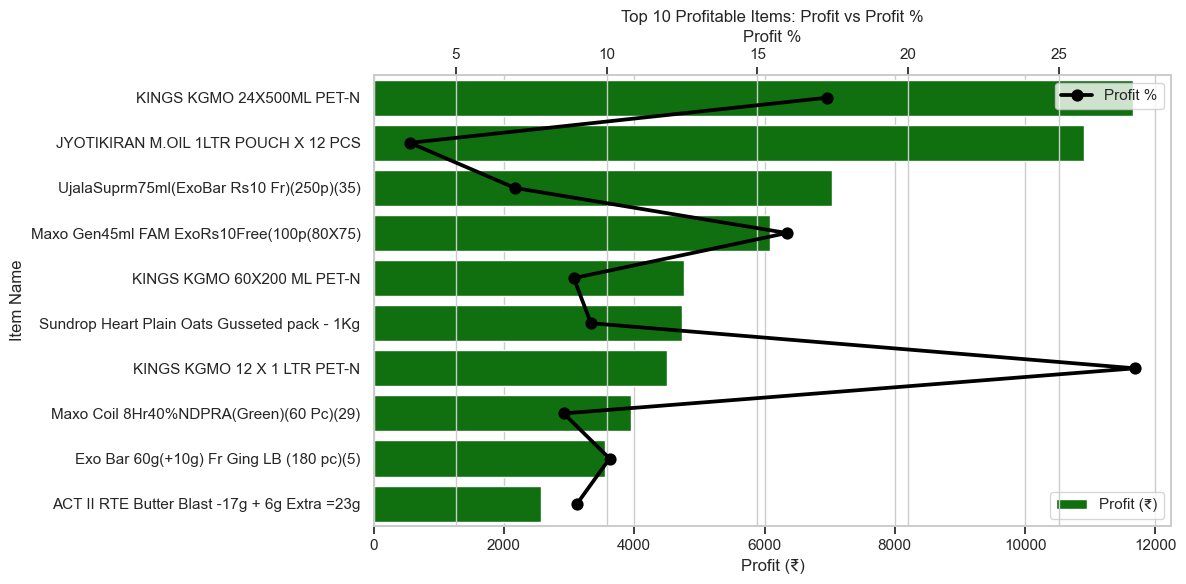

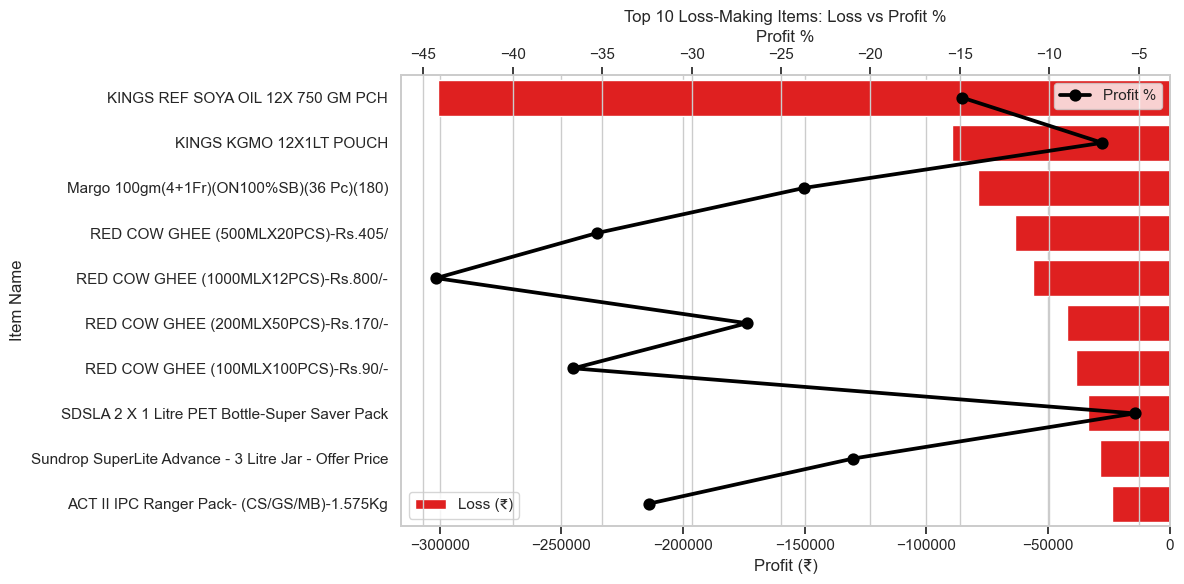

In [64]:
# 🔹 Filter valid items (exclude items with very low purchase values to avoid skewed %)
valid_items = item_profit[item_profit["Total Purchase"] > 10000]

# 🔹 Top 10 profit items
top_profit_items = valid_items.sort_values(by="Profit", ascending=False).head(10)

# 🔹 Top 10 loss items
top_loss_items = valid_items.sort_values(by="Profit").head(10)

# 🔸 Combined Plot: Top Profit Items
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_profit_items, y="Item Name", x="Profit", ax=ax1, color="green", label="Profit (₹)")

# Secondary Y-axis for profit %
ax2 = ax1.twiny()
sns.pointplot(data=top_profit_items, y="Item Name", x="Profit %", ax=ax2, color="black", label="Profit %")

ax1.set_title("Top 10 Profitable Items: Profit vs Profit %")
ax1.set_xlabel("Profit (₹)")
ax2.set_xlabel("Profit %")
plt.tight_layout()
plt.show()

# 🔸 Combined Plot: Top Loss Items
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_loss_items, y="Item Name", x="Profit", ax=ax1, color="red", label="Loss (₹)")

# Secondary Y-axis for profit %
ax2 = ax1.twiny()
sns.pointplot(data=top_loss_items, y="Item Name", x="Profit %", ax=ax2, color="black", label="Profit %")

ax1.set_title("Top 10 Loss-Making Items: Loss vs Profit %")
ax1.set_xlabel("Profit (₹)")
ax2.set_xlabel("Profit %")
plt.tight_layout()
plt.show()






# Month Wise Profit and Profit Percentage Growth

This dual-axis line chart visualizes both:

- 🟦 **Profit (₹)** — total earnings after cost (blue line)
- 🟩 **Profit Percentage (%)** — efficiency of profit relative to purchase cost (green line)

## 🔍 Key Insights:

### ✅ 1. Consistent Uptrend
- Months with both lines rising indicate **healthy growth** in both volume and margin.
- Suggests effective pricing and strong sales execution.

### ⚖️ 2. Diverging Trends
- If **Profit ₹** increases but **Profit %** drops:  
  > High sales but declining efficiency.  
  ➤ **Action:** Recheck margins, renegotiate supplier costs.

- If **Profit ₹** falls but **Profit %** rises:  
  > Lower volume, but better pricing efficiency.  
  ➤ **Action:** Push promotions to boost sales without sacrificing margin.

### 🔻 3. Negative Profit or Declining Trend
- Months where either line dips or crosses below 0 indicate loss periods.
- ➤ **Action:** Audit inventory movement, pricing errors, or customer-level deals.

### 🧠 4. Stability
- Flat trends across months suggest **consistent performance**, but also a **plateau**.  
  ➤ **Action:** Consider new strategies or markets to push growth.

---

### 📌 Business Recommendations

- Maintain items and customer segments contributing to both high ₹ and %.
- Identify months with negative/low % and investigate item-wise & customer-wise breakdown.
- Use trend insights to forecast inventory and plan seasonal campaigns.



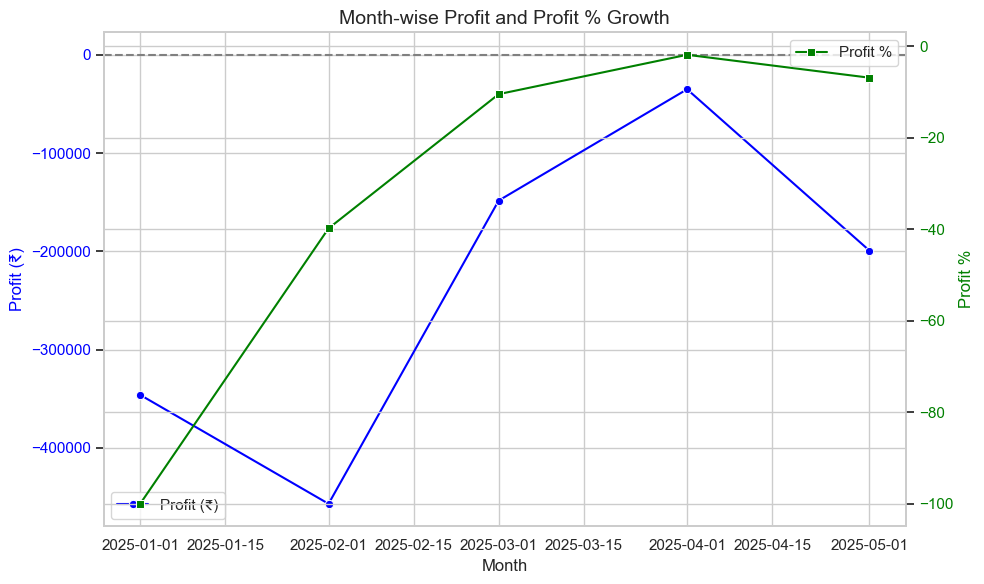

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Month to datetime if not already
monthly_profit["Month"] = pd.to_datetime(monthly_profit["Month"], format="%Y-%m")

# Sort by month
monthly_profit = monthly_profit.sort_values("Month")

# Create figure and two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis: Profit ₹
sns.lineplot(data=monthly_profit, x="Month", y="Profit", marker="o", color="blue", label="Profit (₹)", ax=ax1)
ax1.set_ylabel("Profit (₹)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.axhline(0, color="gray", linestyle="--")

# Second axis: Profit %
ax2 = ax1.twinx()
sns.lineplot(data=monthly_profit, x="Month", y="Profit %", marker="s", color="green", label="Profit %", ax=ax2)
ax2.set_ylabel("Profit %", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Titles and labels
plt.title("Month-wise Profit and Profit % Growth", fontsize=14)
ax1.set_xlabel("Month")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()



---

## 🧑‍💼 Biggest Customers and Providers

### 💰 Top Customers (by Total Sales)
- These customers contribute the **highest revenue**.
- Focus on retaining and rewarding them through loyalty benefits or early access to high-demand products.

### 📦 Top Providers (by Total Purchase)
- These suppliers deliver the **largest volume or value** of products.
- Maintain strong relationships, negotiate better margins, and explore exclusive deals.

---


In [72]:
# Total purchase amount per provider
top_providers = purchase_items.groupby("Party Name")["Amount"].sum().reset_index()
top_providers = top_providers.sort_values(by="Amount", ascending=False)

# Total sales amount per customer
top_customers = sales_items.groupby("Party Name")["Amount"].sum().reset_index()
top_customers = top_customers.sort_values(by="Amount", ascending=False)



## Top 10 Providers

In [73]:
top_providers.head(10)

,Party Name,Amount
0,ADANI WILMAR LTD,2206388.14
1,AGRO TECH FOODS LIMITED,1545217.85
2,ATUL ENTERPRISE,1310154.86
3,AWL AGRI BUSINESS LIMITED,1283448.59
4,Balaji Marketing and Supply Chain Pvt Ltd,649655.75
6,SRESTH PRODUCTS PRIVATE LIMITED,386748.18
5,"MOKSH AGARBATTI CO.,",177250.13
8,Weikfield Foods Pvt. Ltd.,95834.28
7,Shaw Enterprises,74060.70


# Top 10 Customers

In [26]:
top_customers.head()


,Party Name,Amount
449,Rudra Enterprises,417553.00
34,B.N Ghosh,194754.10
258,Loknath Bhandar (Feeder Road-Annapurna Bazar))...,194063.14
234,Khokon Banik,137584.84
112,Dinabondhu Bhandar,124274.42


---

## 🏆 Top 10 Providers and Customers

### 📦 Top 10 Providers by Purchase Amount
This chart shows the suppliers from whom we purchase the most in terms of value (₹).  
These providers are crucial to maintaining product availability and supply chain efficiency.

📝 **Insight:**
- Consider negotiating better deals with high-volume providers.
- Evaluate whether high purchase volumes align with product profitability.

### 💰 Top 10 Customers by Sales Amount
This chart highlights the most valuable customers based on total purchase amount.  
They are key to sustaining business revenue.

📝 **Insight:**
- Focus on retaining these customers through loyalty programs or exclusive offers.
- Analyze their buying behavior to personalize marketing and improve upsell opportunities.

---

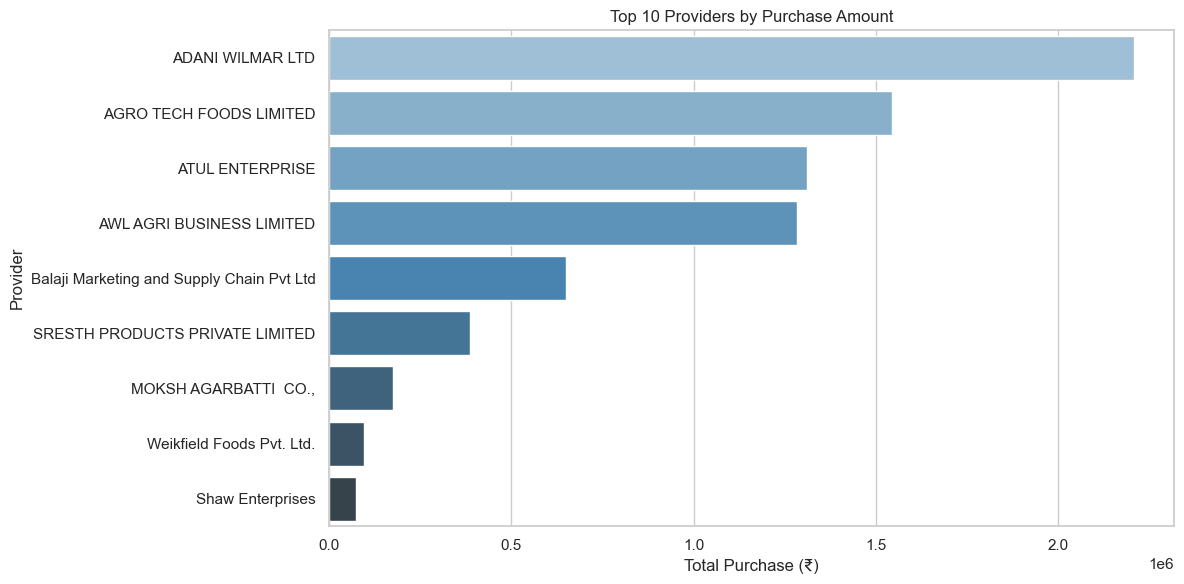

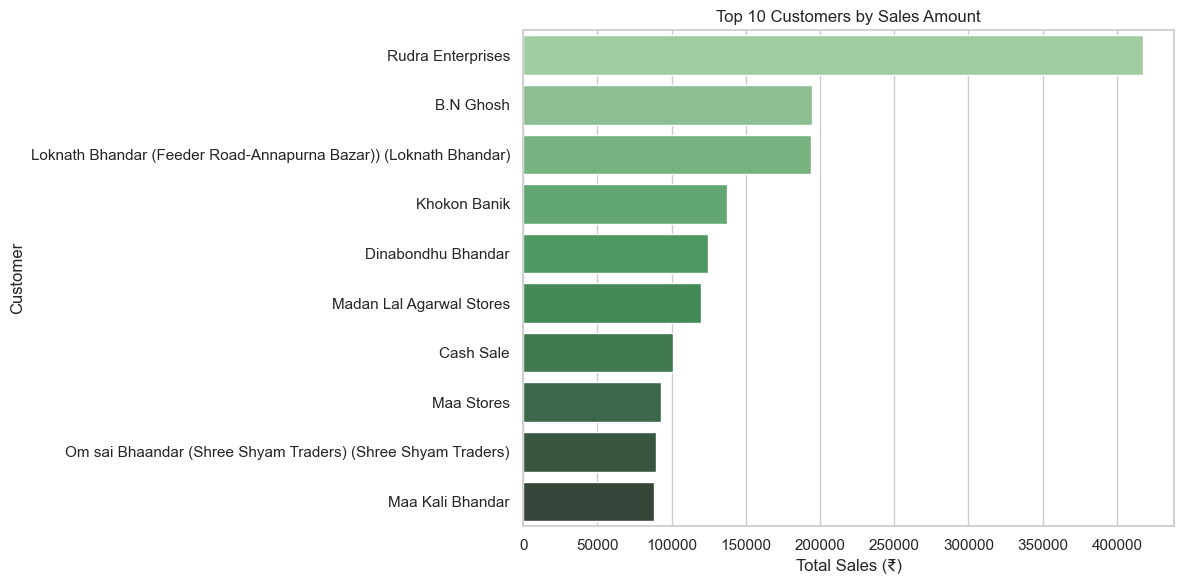

In [27]:
# Top 10 providers
plt.figure(figsize=(12,6))
sns.barplot(data=top_providers.head(10), y="Party Name", x="Amount", palette="Blues_d")
plt.title("Top 10 Providers by Purchase Amount")
plt.xlabel("Total Purchase (₹)")
plt.ylabel("Provider")
plt.tight_layout()
plt.show()

# Top 10 customers
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers.head(10), y="Party Name", x="Amount", palette="Greens_d")
plt.title("Top 10 Customers by Sales Amount")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()


In [81]:
avg_purchase_price = purchase_items.groupby("Item Name").apply(
    lambda df: (df["Amount"].sum() / df["Quantity"].sum())
).reset_index(name="Avg Purchase Price")
sales_with_avg = pd.merge(sales_items, avg_purchase_price, on="Item Name", how="left")
sales_with_avg["Profit"] = sales_with_avg["Amount"] - (sales_with_avg["Avg Purchase Price"] * sales_with_avg["Quantity"])


In [83]:
# Group by customer
customer_summary = sales_with_avg.groupby("Party Name").agg({
    "Amount": "sum",
    "Profit": "sum"
}).reset_index()

# Rename columns
customer_summary.rename(columns={"Amount": "Total Sales", "Profit": "Total Profit"}, inplace=True)

# Median thresholds
median_sales = customer_summary["Total Sales"].median()
median_profit = customer_summary["Total Profit"].median()

# Classification logic
def classify_customer(row):
    if row["Total Sales"] >= median_sales and row["Total Profit"] >= median_profit:
        return "A-Class"
    elif row["Total Sales"] >= median_sales:
        return "B-Class"
    else:
        return "C-Class"

customer_summary["Customer Class"] = customer_summary.apply(classify_customer, axis=1)


---

## 🧑‍💼 Customer Segmentation (A/B/C Classes)

### 🟢 A-Class Customers  
**High Sales + High Profit**

**Who they are:**
- Your best customers
- They buy frequently and purchase high-margin items

**Why they matter:**
- Generate the most revenue and profit  
- Reliable for long-term growth and sustainability

---

### 🟡 B-Class Customers  
**High Sales + Low Profit**

**Who they are:**
- They buy a lot, but profit margins are thin  
- Possibly over-discounted or receive special pricing

**Why they matter:**
- Potential to become A-Class if pricing/cost issues are optimized  
- May be causing operational strain with low ROI

---

### 🔴 C-Class Customers  
**Low Sales + Low Profit**

**Who they are:**
- Small buyers with limited orders  
- Often result in zero or negative margins

**Why they matter:**
- They drain resources and time  
- Might not be worth retaining unless upsell potential is identified

---

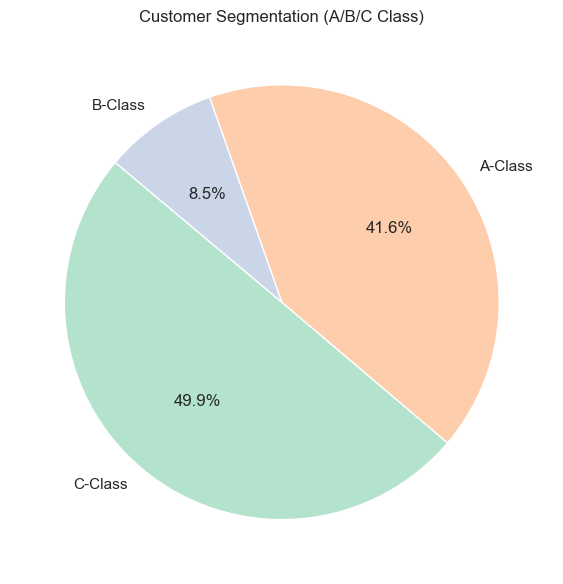

In [85]:
segment_counts = customer_summary["Customer Class"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Pastel2")
)
plt.title("Customer Segmentation (A/B/C Class)")
plt.tight_layout()
plt.show()



---

### 🔍 Insights

- Nearly **half of the customers (49%) are in C-Class**, meaning they contribute **little value to overall business performance**. This dilutes profit margins and operational efficiency.
  
- **A-Class customers form a healthy 41%**, which is a strong base. These customers should be **nurtured, retained, and offered loyalty perks** to maintain and grow their contribution.

- **B-Class is the smallest segment**, indicating very few customers are generating sales but not profit. These are **ideal targets for pricing optimization or cost renegotiation** to boost margins.

---

### 💡 Business Recommendations

1. **Focus on converting C-Class to B or A-Class** through targeted promotions, product bundling, or upselling.
2. Create **special loyalty programs or early access deals** for A-Class customers to retain them.
3. Analyze B-Class accounts to **adjust pricing strategies** or cut unnecessary costs to improve profitability.
4. Consider **dropping persistently underperforming C-Class customers** if they consume too much support/resources.

---


### 📊 Price Strategy Analysis

### 🧾 Understanding Markup in Business Analysis

---

#### 📌 What is Markup?

**Markup** is the difference between the **selling price** of a product and its **cost price (purchase price)**. It is typically expressed as a percentage of the purchase price.

\[
\text{Markup \%} = \frac{\text{Selling Price} - \text{Purchase Price}}{\text{Purchase Price}} \times 100
\]

For example, if you purchase an item for ₹100 and sell it for ₹120:
\[
\text{Markup \%} = \frac{120 - 100}{100} \times 100 = 20\%
\]

---

#### 💼 Why is Markup Important?

- **Helps set pricing** to ensure profitability.
- Allows businesses to measure how much they are earning over the cost.
- Enables comparison of different products' profitability.
- Crucial for evaluating **price strategy**—especially for **high-volume** and **low-margin** items.

---

#### 📊 What Will Be Analyzed?

- Check if **fast-selling items have low markup**, indicating potential underpricing.
- Recommend price adjustments based on item performance and customer segmentation.

---

This understanding will support deeper insights in the **Price Strategy Analysis** and help guide better **pricing decisions** for scaling profits.



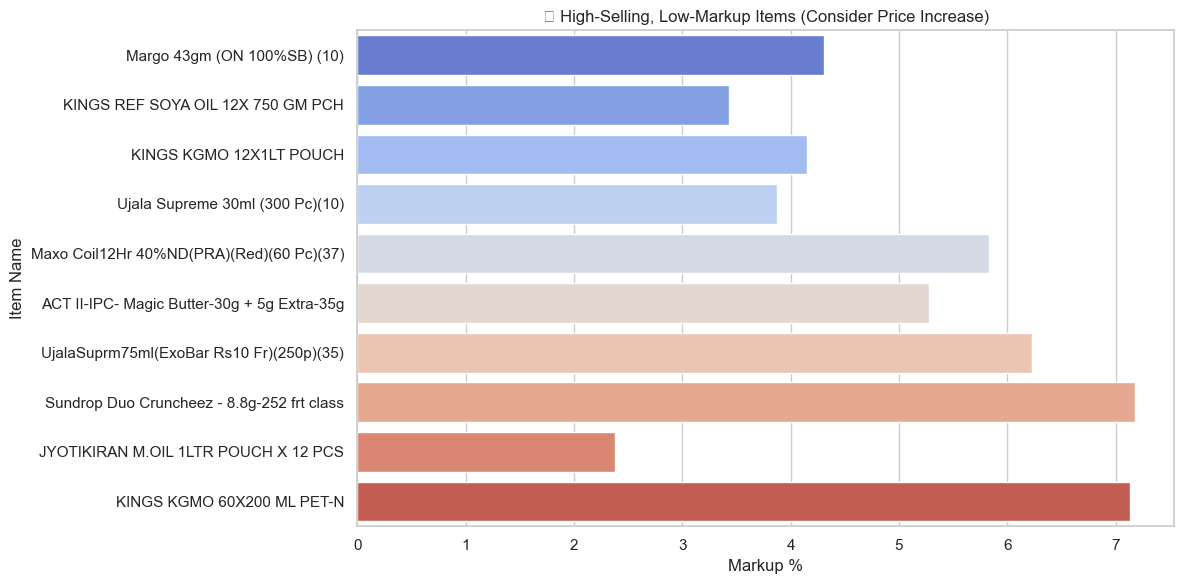

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `sales_items` and `purchase_items` DataFrames are already available

# Step 1: Aggregate Purchase and Sales Data
purchase_summary = purchase_items.groupby("Item Name").agg({
    "Amount": "sum",
    "Quantity": "sum"
}).rename(columns={"Amount": "Total Purchase", "Quantity": "Total Purchased"})

sales_summary = sales_items.groupby("Item Name").agg({
    "Amount": "sum",
    "Quantity": "sum"
}).rename(columns={"Amount": "Total Sales", "Quantity": "Total Sold"})

# Step 2: Merge and Calculate Averages and Markup
pricing_df = pd.merge(purchase_summary, sales_summary, on="Item Name", how="inner")
pricing_df["Avg Purchase Price"] = pricing_df["Total Purchase"] / pricing_df["Total Purchased"]
pricing_df["Avg Sale Price"] = pricing_df["Total Sales"] / pricing_df["Total Sold"]
pricing_df["Markup %"] = ((pricing_df["Avg Sale Price"] - pricing_df["Avg Purchase Price"]) / pricing_df["Avg Purchase Price"]) * 100
pricing_df["Total Units Sold"] = pricing_df["Total Sold"]

# Step 3: Identify Underpriced Bestsellers
underpriced_bestsellers = pricing_df[
    (pricing_df["Total Units Sold"] > pricing_df["Total Units Sold"].median()) &
    (pricing_df["Markup %"] < pricing_df["Markup %"].median())
].sort_values(by="Total Units Sold", ascending=False)

# Step 4: Plot Underpriced Bestsellers
plt.figure(figsize=(12, 6))
sns.barplot(data=underpriced_bestsellers.head(10), x="Markup %", y=underpriced_bestsellers.head(10).index, palette="coolwarm")
plt.title("🚨 High-Selling, Low-Markup Items (Consider Price Increase)")
plt.xlabel("Markup %")
plt.ylabel("Item Name")
plt.tight_layout()
plt.show()


### 📊 Pricing Strategy Analysis – Markup vs Sales Volume

---

#### 📌 Objective

The goal of this analysis is to evaluate the **pricing strategy** by calculating the **markup percentage** of each item and identifying if **high-selling items** are being sold at a **low margin**. This helps optimize pricing to improve overall profitability.

---

#### 🔍 Key Definitions

- **Markup %**:
\[
\text{Markup \%} = \frac{\text{Avg Sale Price} - \text{Avg Purchase Price}}{\text{Avg Purchase Price}} \times 100
\]

- **Avg Purchase Price**: Total purchase cost / Total quantity purchased
- **Avg Sale Price**: Total sales revenue / Total quantity sold

---

#### 📉 Analysis Performed

1. **Aggregated item-level data** for purchases and sales:
   - Total units purchased and sold
   - Total revenue and cost
   - Average purchase and sale price

2. **Calculated Markup %** for each item:
   - Items with **low markup** but **high units sold** were filtered out as **underpriced bestsellers**.

3. **Top 10 underpriced bestsellers** were visualized to identify products with strong demand but weak margins.

---

#### 📈 Insights from the Chart

- Items with **high volume sales but low markup %** are likely driving revenue but **not contributing much to profit**.
- These items are popular in the market and present an opportunity to **slightly increase prices** without majorly affecting demand.
- If price optimization is done carefully, even a small increase in markup for these high-volume items can significantly improve profit margins.

---

#### 💡 Recommendations

- 🛠️ **Review and increase the price** of underpriced bestsellers gradually.
- 🧪 **Test pricing changes** on a smaller customer group or market to avoid sales drops.
- 💬 Use customer segmentation to identify **price-sensitive vs loyal buyers** and apply **dynamic pricing** where appropriate.
- 📦 Ensure the supply chain and purchase prices for these items are stable, so the margin doesn't shrink further.

---

#### ✅ Business Value

By identifying high-demand, low-margin items:
- You avoid **leaving money on the table**.
- You build a **data-backed pricing strategy**.
- You improve overall **profitability without needing more sales**.

---


# 📘 Summary of Inventory & Profitability Analysis

This report provides a detailed overview of inventory health, profitability, customer behavior, supplier performance, and pricing strategy based on data from **Jan to May 2025**.

---

## 🔍 1. Dead Stock Analysis

- **161 products** in purchase data  
- **139 products** in sales data  
➡️ **22 items** identified as **Dead Stock** (never sold)

**Recommendations:**
- Offer **discounts** to move idle stock.
- Explore **B2B bulk deals** with retailers/distributors.

---

## 💹 2. Item-wise Profit & Loss

- **Top 10 profitable items** and **top 10 loss-making items** visualized.
- Dead stock does **not appear** in top-loss because they were **never sold**.

**Recommendations:**
- Promote top-performing items.
- Review pricing or discontinue consistent loss-makers.

---

## 📆 3. Monthly Profit & Growth Trends

- **Month-wise profit and profit percentage** visualized.
- Trends highlight months with dips/spikes in performance.

**Recommendation:**
- Align inventory planning with **seasonal trends** and **growth insights**.

---

## 🧑‍💼 4. Top 10 Providers and Customers

- **Top Providers** by purchase value.
- **Top Customers** by sales value.

**Insights:**
- Prioritize **relationship management** with top customers.
- Negotiate **better pricing/terms** with major providers.

---

## 📊 5. Customer Segmentation (A/B/C Classes)

- **A-Class**: High sales + High profit → Key customers
- **B-Class**: Moderate sales/profit
- **C-Class**: Low sales/profit

**Recommendation:**
- Focus marketing and retention efforts on **A-class customers**.
- Develop strategies to **upgrade B and C-class**.

---

## 💵 6. Markup Percentage & Pricing Strategy

**Markup %** = \((\text{Selling Price} - \text{Cost Price}) / \text{Cost Price} \times 100\)

- Items analyzed for **markup vs. sales volume**.
- Identified **mispriced items** sold at high volume but low margin.

**Recommendation:**
- Reevaluate pricing to improve margins.
- Use insights to design a **data-driven pricing strategy**.

---

## ✅ Final Recommendations

1. 💡 **Continue selling** top profitable items.
2. 📉 **Reprice or discontinue** loss-making products.
3. 📦 **Liquidate dead stock** using discounts or B2B sales.
4. 📊 **Optimize pricing** based on markup analysis.
5. 🧑‍💼 **Reward top customers** and manage key providers.
6. 📈 Use customer segmentation for **targeted campaigns**.

---
